<a href="https://colab.research.google.com/github/madfrantic/helloworld/blob/main/project01b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello world Project01

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/madfrantic/helloworld/refs/heads/main/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
)

schools = df.copy()


print("Dataset Info:")
schools.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  

In [65]:
print("\nList of Schools:")
for school in sorted(schools["School Name"].unique()):
    print(school)


List of Schools:
47 The American Sign Language and English Secondar
A. Philip Randolph Campus High School
ACORN Community High School
Abraham Lincoln High School
Abraham Lincoln Yabc
Academy for Careers in Television and Film
Academy for Conservation and the Environment
Academy for Environmental Leadership
Academy for Health Careers
Academy for Language and Technology
Academy for Scholarship and Entrepreneurship: A Co
Academy for Social Action
Academy for Software Engineering
Academy of American Studies
Academy of Finance and Enterprise
Academy of Hospitality and Tourism
Academy of Innovative Technology
Academy of Urban Planning
Alfred E. Smith Career and Technical Education Hig
Art and Design High School
Arts & Media Preparatory Academy
Aspirations Diploma Plus High School
Astor Collegiate Academy
August Martin High School
Aviation Career & Technical Education High School
BOYS AND GIRLS YABC
Banana Kelly High School
Bard High School Early College
Bard High School Early College Queens

In [80]:
schools_qc = schools[
    schools["School Name"].str.contains("Art and Design High School", na=False)
]

print("\nArt and Design High School — All Years:")
display(schools_qc)


Art and Design High School — All Years:


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
2288,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2015,238,54.9,164,68.9,74,31.1,14,5.9,14,5.9
2289,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2016,237,50.1,186,78.5,51,21.5,13,5.5,13,5.5
2290,02M630,Art and Design High School,High school,Algebra2/Trigonometry,2017,27,43.2,24,88.9,3,11.1,0,0,0,0
2291,02M630,Art and Design High School,High school,Common Core Algebra,2015,458,63.3,204,44.5,254,55.5,1,0.2,86,18.8
2292,02M630,Art and Design High School,High school,Common Core Algebra,2016,367,71.3,86,23.4,281,76.6,83,22.6,236,64.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149295,02M630,Art and Design High School,High school,U.S. History and Government,2017,22,86.5,0,0,22,100,20,90.9,na,na
149296,02M630,Art and Design High School,High school,U.S. History and Government,2017,79,80.2,10,12.7,69,87.3,51,64.6,na,na
149297,02M630,Art and Design High School,High school,U.S. History and Government,2017,210,77.5,33,15.7,177,84.3,99,47.1,na,na
149298,02M630,Art and Design High School,High school,U.S. History and Government,2017,16,84.9,1,6.3,15,93.8,14,87.5,na,na


In [66]:
# Drop null rows
schools_qc_all = schools_qc.dropna(axis=0)
print("\nAfter dropping nulls:")
schools_qc_all.info()

# Remove rows where Mean Score is 's'
schools_qc_all = schools_qc_all[schools_qc_all["Mean Score"] != "s"].copy()

# Convert Mean Score to float
schools_qc_all["Mean Score"] = schools_qc_all["Mean Score"].astype(float)

# Remove very low scores (<70)
schools_qc_all = schools_qc_all[schools_qc_all["Mean Score"] > 70]

# Sort by score
schools_qc_all = schools_qc_all.sort_values(by="Mean Score")

print("\nCleaned Art and Design High School (All Years):")
display(schools_qc_all)


After dropping nulls:
<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 2288 to 149299
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School DBN                   474 non-null    object
 1   School Name                  474 non-null    object
 2   School Level                 474 non-null    object
 3   Regents Exam                 474 non-null    object
 4   Year                         474 non-null    int64 
 5   Total Tested                 474 non-null    int64 
 6   Mean Score                   474 non-null    object
 7   Number Scoring Below 65      474 non-null    object
 8   Percent Scoring Below 65     474 non-null    object
 9   Number Scoring 65 or Above   474 non-null    object
 10  Percent Scoring 65 or Above  474 non-null    object
 11  Number Scoring 80 or Above   474 non-null    object
 12  Percent Scoring 80 or Above  474 non-null    object
 13  Number Scor

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
23674,02M630,Art and Design High School,High school,U.S. History and Government,2015,47,70.1,16,34,31,66,17,36.2,na,na
23633,02M630,Art and Design High School,High school,English,2016,17,70.2,4,23.5,13,76.5,4,23.5,7,41.2
149213,02M630,Art and Design High School,High school,Global History and Geography,2017,273,70.2,78,28.6,195,71.4,83,30.4,na,na
149139,02M630,Art and Design High School,High school,Common Core Algebra,2016,211,70.2,51,24.2,160,75.8,34,16.1,129,61.1
60052,02M630,Art and Design High School,High school,Geometry,2015,86,70.3,26,30.2,60,69.8,19,22.1,19,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149164,02M630,Art and Design High School,High school,Common Core English,2016,31,85.7,2,6.5,29,93.5,24,77.4,26,83.9
149165,02M630,Art and Design High School,High school,Common Core English,2017,21,85.7,0,0,21,100,17,81,19,90.5
149294,02M630,Art and Design High School,High school,U.S. History and Government,2016,31,86.4,0,0,31,100,24,77.4,na,na
149295,02M630,Art and Design High School,High school,U.S. History and Government,2017,22,86.5,0,0,22,100,20,90.9,na,na


In [67]:
# Clean the full dataset once
cleaned = (
    schools_qc
    .dropna(axis=0)
    .query("`Mean Score` != 's'")
    .assign(**{"Mean Score": lambda df: df["Mean Score"].astype(float)})
    .query("`Mean Score` > 70")
    .sort_values("Mean Score")
)

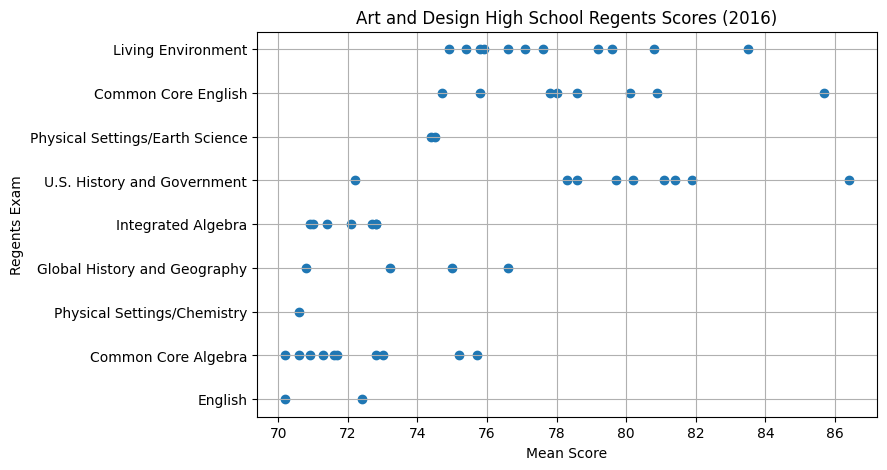

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(schools_qc_2016["Mean Score"], schools_qc_2016["Regents Exam"])
plt.title("Art and Design High School Regents Scores (2016)")
plt.xlabel("Mean Score")
plt.ylabel("Regents Exam")
plt.grid(True)
plt.show()

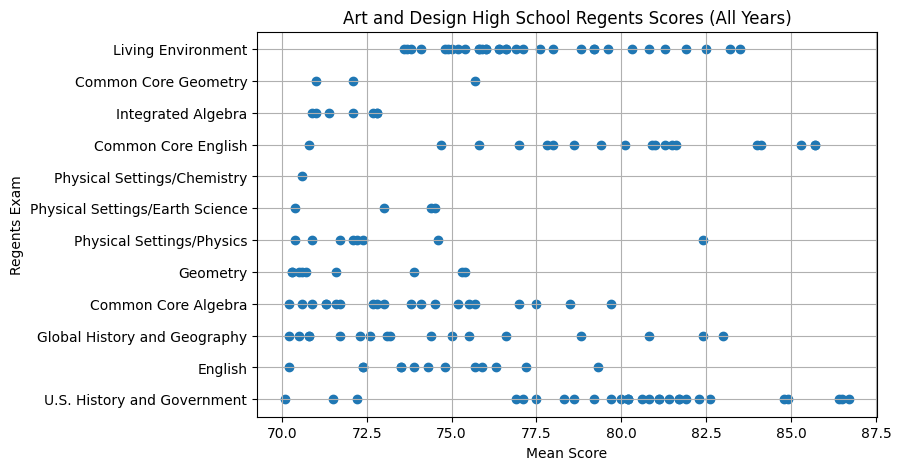

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(schools_qc_all["Mean Score"], schools_qc_all["Regents Exam"])
plt.title("Art and Design High School Regents Scores (All Years)")
plt.xlabel("Mean Score")
plt.ylabel("Regents Exam")
plt.grid(True)
plt.show()

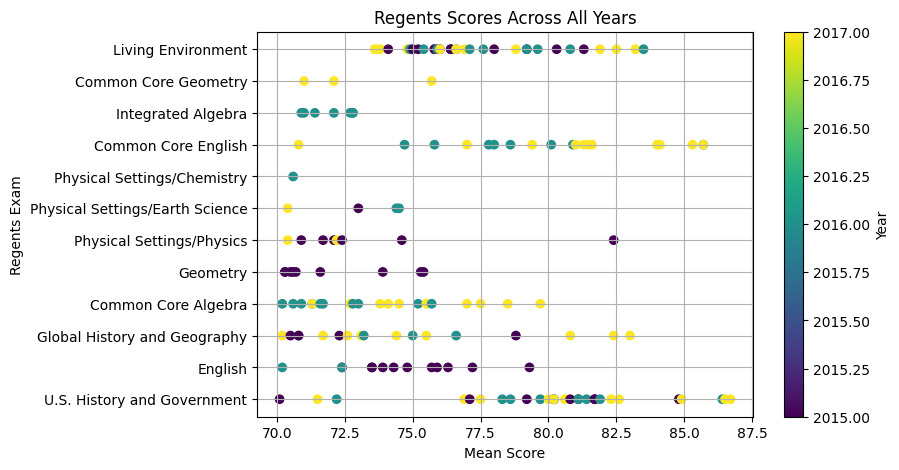

In [69]:
plt.figure(figsize=(8,5))
plt.scatter(
    schools_qc_all["Mean Score"],
    schools_qc_all["Regents Exam"],
    c=schools_qc_all["Year"], cmap="viridis"
)
plt.title("Regents Scores Across All Years")
plt.xlabel("Mean Score")
plt.ylabel("Regents Exam")
plt.colorbar(label="Year")
plt.grid(True)
plt.show()

In [ ]:
# Clean 's' values
schools = schools[schools["Mean Score"] != "s"].copy()

# Restrict to secondary schools only
schools = schools[schools["School Level"] == "High school"]

# Restrict to 2016 only
schools = schools[schools["Year"].astype(str) == "2016"]

# Convert Mean Score to float
schools["Mean Score"] = schools["Mean Score"].astype(float)

# Filter out low outlier scores
schools = schools[schools["Mean Score"] > 70].copy()

# Compute mean score for each school
schools_avg = schools.groupby("School Name")["Mean Score"].mean().sort_values()

print("\nAverage Regents High School Scores Across Schools:")
display(schools_avg)


Average Regents High School Scores Across Schools:


,Mean Score
School Name,
Bronx Engineering and Technology Academy,70.100000
Abraham Lincoln Yabc,70.100000
Epic High School - South,70.200000
Mott Haven Community High School,70.200000
The Brooklyn Academy of Global Finance,70.300000
...,...
High School of American Studies at Lehman College,88.044286
Queens High School for the Sciences at York Colleg,88.340741
Bronx High School of Science,88.928947


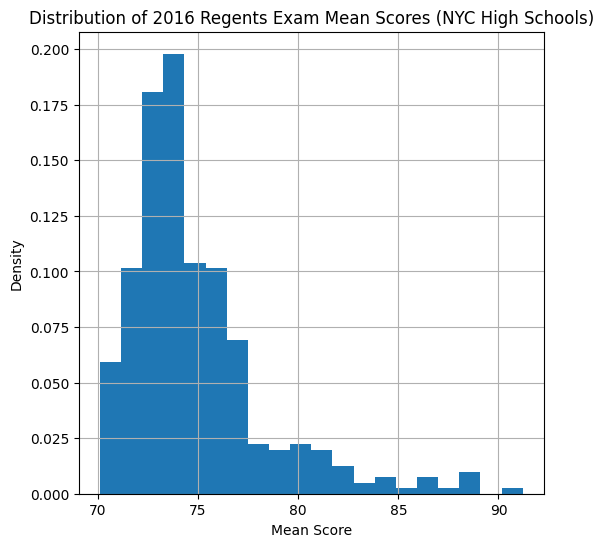

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(schools_avg, bins=20, density=True)
plt.title("Distribution of 2016 Regents Exam Mean Scores (NYC High Schools)")
plt.xlabel("Mean Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
print("\nDescriptive statistics for numeric columns:")
print(df.describe())

print("\nValue counts for school_name:")
print(df['school_name'].value_counts())

print("\nValue counts for school_level:")
print(df['school_level'].value_counts())

print("\nValue counts for regents_exam:")
print(df['regents_exam'].value_counts())

print("\nValue counts for year:")
print(df['year'].value_counts())


Descriptive statistics for numeric columns:
                Year   Total Tested
count  212331.000000  212331.000000
mean     2015.956069      49.364200
std         0.799726      93.023576
min      2015.000000       1.000000
25%      2015.000000       5.000000
50%      2016.000000      20.000000
75%      2017.000000      57.000000
max      2017.000000    1729.000000

Value counts for school_name:


KeyError: 'school_name'